In [ ]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:
ls

sample_data/


In [ ]:
#Loading Data:
data = pd.read_csv("/content/sample_data/PRUEBA MODELADO_24_05 (1).csv", sep=';')
data.head(15)

f(vij)class  f(vij)class.1   DD1(s2)    DD2(s2)    DD3(s2)   DV1(s2)  \
0             0       0.333333 -0.522222 -13.777778  -6.008084  0.164695   
1             0       0.333333 -0.522222 -17.777778  -4.916389 -0.723537   
2             0       0.333333 -0.522222 -12.777778  -4.186549 -0.985434   
3             0       0.333333 -0.522222 -10.777778  -5.269133 -0.698610   
4             0       0.333333 -0.522222  -9.777778  -3.073074 -1.065304   
5             0       0.333333 -0.522222 -13.777778  -5.718804 -0.588608   
6             0       0.333333 -0.322222 -12.777778  -0.967812  0.357709   
7             1       0.333333  1.077778  23.222222   2.474428  0.160124   
8             0       0.333333 -0.522222 -13.777778  -3.732715  1.167653   
9             1       0.333333  0.477778  12.222222   6.447434  0.790038   
10            1       0.333333  0.677778  16.222222   0.949984  0.842577   
11            0       0.333333 -0.322222  -7.777778  -4.051591  0.859953   
12            0       0.333333 -0.522222 -13.777778  -5.122643  2.319641   
13            1       0.333333  0.677778  19.222222  10.925513  0.089265   
14            0       0.333333 -0.322222  -5.777778  -5.033047  1.047830   

     DV2(s2)   DV3(s2)   DV4(s2)   DV5(s2)    DV6(s2)   DD1(s3)    DD2(s3)  \
0  -0.156926 -0.007768  0.052922 -0.000653  -6.687222 -0.208511  -4.042553   
1   0.013363  0.710175  0.022200 -0.059107 -12.987222 -0.208511  -8.042553   
2   0.022470  0.962964  0.028626 -0.013043  -4.967222 -0.208511  -3.042553   
3   0.234161  0.464450 -0.061923 -0.025419  -2.577222 -0.208511  -1.042553   
4  -0.258744  1.324049  0.137579  0.023461  -1.757222 -0.208511  -0.042553   
5  -0.080681  0.669289  0.052551 -0.009939  -5.427222 -0.208511  -4.042553   
6   0.855650 -1.213360 -0.335827  0.010727  -6.857222 -0.640964 -18.487952   
7  -0.724251  0.564126  0.266831  0.029642   6.142778  0.759036  17.512048   
8   0.747447 -1.915100 -0.325548 -0.063420  -5.317222 -0.840964 -19.487952   
9  -0.204545 -0.585492  0.047324  0.044337   1.912778  0.159036   6.512048   
10  0.106503 -0.949080 -0.071839  0.010822   6.002778  0.359036  10.512048   
11  0.134480 -0.994432 -0.083033  0.022020  -2.997222 -0.640964 -13.487952   
12  1.028281 -3.347923 -0.474712 -0.084595  -5.167222 -0.840964 -19.487952   
13 -0.338853  0.249588  0.124301  0.042597  14.852778  0.359036  13.512048   
14  0.192196 -1.240027 -0.111849 -0.028341  -3.857222 -0.640964 -11.487952   

      DD3(s3)   DV1(s3)   DV2(s3)   DV3(s3)   DV4(s3)   DV5(s3)    DV6(s3)  
0   -4.209042  0.051592 -0.598721  0.547129  0.223624  0.041076   2.062979  
1   -3.117348 -0.836640 -0.428433  1.265072  0.192901 -0.017378  -4.237021  
2   -2.387508 -1.098536 -0.419325  1.517861  0.199328  0.028686   3.782979  
3   -3.470091 -0.811713 -0.207634  1.019347  0.108778  0.016311   6.172979  
4   -1.274033 -1.178407 -0.700539  1.878946  0.308280  0.065191   6.992979  
5   -3.919762 -0.701711 -0.522476  1.224187  0.223253  0.031790   3.322979  
6   -6.757147  0.128825  0.736367 -0.865192 -0.282272  0.022400  -6.102892  
7   -3.314906 -0.068760 -0.843534  0.912294  0.320386  0.041314   6.897108  
8   -9.522049  0.938768  0.628164 -1.566932 -0.271993 -0.051748  -4.562892  
9    0.658099  0.561153 -0.323828 -0.237324  0.100879  0.056009   2.667108  
10  -4.839351  0.613692 -0.012780 -0.600912 -0.018285  0.022494   6.757108  
11  -9.840925  0.631068  0.015197 -0.646264 -0.029479  0.033693  -2.242892  
12 -10.911977  2.090756  0.908998 -2.999755 -0.421157 -0.072923  -4.412892  
13   5.136179 -0.139620 -0.458136  0.597756  0.177856  0.054269  15.607108  
14 -10.822381  0.818945  0.072913 -0.891859 -0.058295 -0.016668  -3.102892

In [ ]:
data['f(vij)class'].unique()

array([0, 1])

Brenda: Ver el analisis de los datos para ver si hay nulos

In [ ]:
data.isnull().sum()

f(vij)class      0
f(vij)class.1    0
DD1(s2)          0
DD2(s2)          0
DD3(s2)          0
DV1(s2)          0
DV2(s2)          0
DV3(s2)          0
DV4(s2)          0
DV5(s2)          0
DV6(s2)          0
DD1(s3)          0
DD2(s3)          0
DD3(s3)          0
DV1(s3)          0
DV2(s3)          0
DV3(s3)          0
DV4(s3)          0
DV5(s3)          0
DV6(s3)          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   f(vij)class    195 non-null    int64  
 1   f(vij)class.1  195 non-null    float64
 2   DD1(s2)        195 non-null    float64
 3   DD2(s2)        195 non-null    float64
 4   DD3(s2)        195 non-null    float64
 5   DV1(s2)        195 non-null    float64
 6   DV2(s2)        195 non-null    float64
 7   DV3(s2)        195 non-null    float64
 8   DV4(s2)        195 non-null    float64
 9   DV5(s2)        195 non-null    float64
 10  DV6(s2)        195 non-null    float64
 11  DD1(s3)        195 non-null    float64
 12  DD2(s3)        195 non-null    float64
 13  DD3(s3)        195 non-null    float64
 14  DV1(s3)        195 non-null    float64
 15  DV2(s3)        195 non-null    float64
 16  DV3(s3)        195 non-null    float64
 17  DV4(s3)        195 non-null    float64
 18  DV5(s3)   

In [ ]:
#Model_LDA

In [ ]:
Y_LDA= data.iloc[:,0]
X_LDA= data.iloc[:, 1:]

In [ ]:
#esto se usa para dividir los datos, el 33% de los datos se usarán para hacer un test, mientras que el 67% se usará para entrenar
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_LDA, Y_LDA, test_size=0.33, random_state=42)

In [ ]:
# Definir las probabilidades a priori de clasificación
priors = [0.5, 0.5]

In [ ]:
# Inicializar el modelo LDA con las probabilidades a priori
LDA = LinearDiscriminantAnalysis(priors=priors)

In [ ]:
LDA.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [ ]:
y_pred_train_LDA = LDA.predict(X_train_LDA)
y_pred_test_LDA = LDA.predict(X_test_LDA)

In [ ]:
# Realizar validación cruzada con LinearDiscriminantAnalysis
cv_scores = cross_val_score(LDA, X_train_LDA, y_train_LDA, cv=5)  # 5-fold cross-validation
print("Cross-validation Scores:", cv_scores)

Cross-validation Scores: [0.76923077 0.88461538 0.88461538 0.92307692 0.88461538]


In [ ]:
# Obtener nombres de las variables
nombres_variables = X_LDA.columns

In [ ]:
# Coeficientes de la función discriminante lineal
coefficients = LDA.coef_[0]
intercept = LDA.intercept_[0]

In [ ]:
# Imprimir la ecuación de la recta con nombres de variables
print("Ecuación de la recta:")
print("y = ", end="")
for i, coeficiente in enumerate(coefficients):
    nombre_variable = nombres_variables[i]
    print(f"({coeficiente:.2f} * {nombre_variable}) + ", end="")
print(f"{intercept:.2f}")

Ecuación de la recta:
y = (7.24 * f(vij)class.1) + (6.54 * DD1(s2)) + (-0.00 * DD2(s2)) + (0.15 * DD3(s2)) + (-0.80 * DV1(s2)) + (0.35 * DV2(s2)) + (0.43 * DV3(s2)) + (-0.02 * DV4(s2)) + (-5.31 * DV5(s2)) + (0.22 * DV6(s2)) + (-2.07 * DD1(s3)) + (-0.06 * DD2(s3)) + (-0.06 * DD3(s3)) + (0.22 * DV1(s3)) + (0.15 * DV2(s3)) + (-0.16 * DV3(s3)) + (-0.64 * DV4(s3)) + (14.32 * DV5(s3)) + (-0.04 * DV6(s3)) + -3.58


In [ ]:
confusion_matrix(y_train_LDA,y_pred_train_LDA)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

sn =((tp)/(tp+fn))*100
sp = ((tn)/(tn+fp))*100
print("Training Set")
print("Sensitivity:", sn)
print("Specificity:", sp)


confusion_matrix(y_test_LDA,y_pred_test_LDA)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

sn =((tp)/(tp+fn))*100
sp = ((tn)/(tn+fp))*100
print("Testing Set")
print("Sensitivity:", sn)
print("Specificity:", sp)

Training Set
Sensitivity: 50.0
Specificity: 0.0
Testing Set
Sensitivity: 50.0
Specificity: 0.0


In [ ]:
#Decision tree_Model

In [ ]:
Y_tree= data.iloc[:,0]
X_tree= data.iloc[:, 1:]

In [ ]:
#El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento en datos nunca antes vistos.
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, Y_tree, test_size=0.33, random_state=42)

In [ ]:
#Asigna pesos iguales a ambas clases (0 y 1).Si las clases están desbalanceadas, asignar pesos más altos a las clases minoritarias puede ayudar a mejorar el rendimiento del modelo. En este caso, se asume un balance entre las clases.
class_weights = {0: 0.5, 1: 0.5}
seed = 40
# Define the decision tree model y aplica los pesos de class weights definidos anteriormente
tree_model = DecisionTreeClassifier(random_state=seed,class_weight=class_weights)

In [ ]:
# Define the hyperparameter search space
param_grid = {
    'criterion': ['gini', 'entropy'],
     'max_depth': [20],
     'min_samples_split': [3],
    'min_samples_leaf': [2]
}

In [ ]:
# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train_tree, y_train_tree)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5},
                                              random_state=40),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_leaf': [2], 'min_samples_split': [3]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters
best_params = grid_search_tree.best_params_
print("better hyperparameters :", best_params)

better hyperparameters : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
 # Print all hyperparameters, including internal hyperparameters
all_params = grid_search_tree.best_estimator_.get_params()
print("\nAll hyperparameters:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


All hyperparameters:
ccp_alpha: 0.0
class_weight: {0: 0.5, 1: 0.5}
criterion: gini
max_depth: 20
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 3
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 40
splitter: best


In [ ]:
# Ramdom forest_Model

In [ ]:
Y_rf= data.iloc[:,0]
X_rf= data.iloc[:, 1:]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.33, random_state=42)

In [ ]:
class_weights = {0: 0.5, 1: 0.5}
seed = 44

In [ ]:
# Define the random forest model
rf_model = RandomForestClassifier(random_state=seed,class_weight=class_weights)

In [ ]:
# Definir el rango de hiperparámetros a explorar
param_grid = {
    'n_estimators': [10],
    'max_depth': [200],
    'min_samples_split': [10],
    'min_samples_leaf': [3]
}

In [ ]:
# Perform hyperparameter search by cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.5, 1: 0.5},
                                              random_state=44),
             param_grid={'max_depth': [200], 'min_samples_leaf': [3],
                         'min_samples_split': [10], 'n_estimators': [10]},
             scoring='accuracy')

In [ ]:
# best hyperparameters
best_params = grid_search_rf.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 200, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10}


In [ ]:
# Print all hyperparameters, including internal hyperparameters
all_params = grid_search_rf.best_estimator_.get_params()
print("\nTodos los hiperparámetros:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


Todos los hiperparámetros:
bootstrap: True
ccp_alpha: 0.0
class_weight: {0: 0.5, 1: 0.5}
criterion: gini
max_depth: 200
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 3
min_samples_split: 10
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 10
n_jobs: None
oob_score: False
random_state: 44
verbose: 0
warm_start: False


In [ ]:
# GB_Model

In [ ]:
Y_gb= data.iloc[:,0]
X_gb= data.iloc[:, 1:]

In [ ]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, Y_gb, test_size=0.33, random_state=42)

In [ ]:
seed = 42
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=seed)

In [ ]:
# Define the range of hyperparameters to scan
param_grid = {
    'n_estimators': [3],
    'learning_rate': [0.9],
    'max_depth': [80],
    'min_samples_split': [7],
    'min_samples_leaf': [6]
}

In [ ]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Entrenar el modelo
grid_search_gb.fit(X_train_gb, y_train_gb)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.9], 'max_depth': [80],
                         'min_samples_leaf': [6], 'min_samples_split': [7],
                         'n_estimators': [3]},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.9, 'max_depth': 80, 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 3}


In [ ]:
# Print all internal hyperparameters
internal_params = grid_search_gb.best_estimator_.get_params()
print("\nTodos los hiperparámetros internos:")
for param_name, param_value in internal_params.items():
    print(f"{param_name}: {param_value}")


Todos los hiperparámetros internos:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.9
loss: log_loss
max_depth: 80
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 6
min_samples_split: 7
min_weight_fraction_leaf: 0.0
n_estimators: 3
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [ ]:
# KNN models

El modelo KNN evalua los vecinos más cercanos, para ello separamos los valores X y Y. Las variables X son las variables explicativas, mientras que las variables Y, es la variable objetivo. Separamos en train y test. Las variables deben ser numéricas para poder ver la distacia entre el train y el test, por ello se usan todas las variables numéricas.

In [ ]:
Y_knn= data.iloc[:,0]
X_knn= data.iloc[:, 1:]

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, Y_knn, test_size=0.33, random_state=42)

In [ ]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=5)

In [ ]:
# Define the hyperparameter search space
param_grid = {
   'n_neighbors': [20],  # Range of values for n_neighbors
    'p': [7]  # Range of values for the power parameter
}

In [ ]:
# Perform hyperparameter search by cross-validation
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [20], 'p': [7]}, scoring='accuracy')

GridSearchCV es una herramienta en scikit-learn que nos ayuda a encontrar automáticamente la mejor combinación de estos hiperparámetros, para obtener el mejor rendimiento del modelo


In [ ]:
# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters for KNeighborsClassifier:", best_params_knn)

Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 20, 'p': 7}


In [ ]:
# Print all hyperparameters, including internal hyperparameters
all_params_knn = grid_search_knn.best_estimator_.get_params()
print("\nAll hyperparameters for KNeighborsClassifier:")
for param_name, param_value in all_params_knn.items():
    print(f"{param_name}: {param_value}")


All hyperparameters for KNeighborsClassifier:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 20
p: 7
weights: distance


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=20, p=7, weights='uniform')


In [ ]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_jobs=1, n_neighbors=20, p=7)

In [ ]:
prediccion = knn.predict(X_train_knn)

In [ ]:
# make predictions on the train set
y_pred_train_LDA = LDA.predict(X_train_LDA)
y_pred_train_tree = grid_search_tree.predict(X_train_tree)
y_pred_train_rf = grid_search_rf.predict(X_train_rf)
y_pred_train_gb = grid_search_gb.predict(X_train_gb)
y_pred_train_knn = grid_search_knn.predict(X_train_knn)

# MATRICES DE CONFUSION

In [ ]:
# calculate confusion matrices
cm_train_LDA = confusion_matrix(y_train_LDA, y_pred_train_LDA)
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
cm_train_rf = confusion_matrix(y_train_rf, y_pred_train_rf)
cm_train_gb = confusion_matrix(y_train_gb, y_pred_train_gb)
cm_train_knn = confusion_matrix(y_train_knn, y_pred_train_knn)

In [ ]:
# prompt: Hacer un plot de la matriz de confusion cm_train_LDA

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_LDA, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (LDA)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


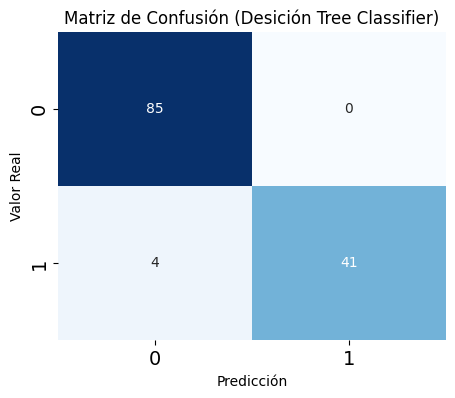

In [ ]:
# prompt: Hacer un plot de la matriz de confusion cm_train_

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (Desición Tree Classifier)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

In [ ]:
# prompt: Hacer un plot de la matriz de confusion cm_train_

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (Random Forest Classifier)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

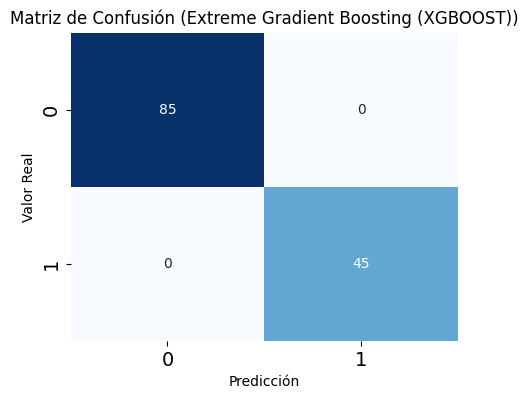

In [ ]:
# prompt: Hacer un plot de la matriz de confusion cm_train_

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (Extreme Gradient Boosting (XGBOOST))")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

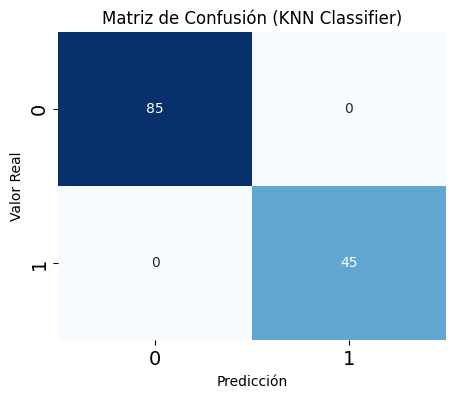

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (KNN Classifier)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

In [ ]:
cm_train_LDA

array([[82,  3],
       [ 8, 37]])

El modelo Desicion tree, en el que tiene solo 4 falsos negativos,

In [ ]:
cm_train_tree

array([[85,  0],
       [ 4, 41]])

In [ ]:
cm_train_rf

array([[83,  2],
       [ 5, 40]])

El modelo KNN, te da una matrix de confusion perfecta, ya que tiene 0 falsos negativos y falsos positivos.

In [ ]:
cm_train_knn

array([[85,  0],
       [ 0, 45]])

test matrices

# Métricas principales: Las siguientes métricas se utilizan comúnmente para evaluar el rendimiento de los modelos de clasificación:



# Nueva sección

In [ ]:
# calculate performance metrics
tn_train_LDA, fp_train_LDA, fn_train_LDA, tp_train_LDA = cm_train_LDA.ravel()
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
tn_train_rf, fp_train_rf, fn_train_rf, tp_train_rf = cm_train_rf.ravel()
tn_train_gb, fp_train_gb, fn_train_gb, tp_train_gb = cm_train_gb.ravel()
tn_train_knn, fp_train_knn, fn_train_knn, tp_train_knn = cm_train_knn.ravel()

MODELO LDA

In [ ]:
specificity_train_LDA = tn_train_LDA / (tn_train_LDA + fp_train_LDA)
sensitivity_train_LDA = tp_train_LDA / (tp_train_LDA + fn_train_LDA)
accuracy_train_LDA = (tp_train_LDA + tn_train_LDA) / (tp_train_LDA + tn_train_LDA + fp_train_LDA + fn_train_LDA)
false_positive_train_LDA = fp_train_LDA / (fp_train_LDA + tn_train_LDA)

MODELO Arbol de desición

In [ ]:
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)

Modelo random forest

In [ ]:
specificity_train_rf = tn_train_rf / (tn_train_rf + fp_train_rf)
sensitivity_train_rf = tp_train_rf / (tp_train_rf + fn_train_rf)
accuracy_train_rf = (tp_train_rf + tn_train_rf) / (tp_train_rf + tn_train_rf + fp_train_rf + fn_train_rf)
false_positive_train_rf = fp_train_rf / (fp_train_rf + tn_train_rf)

Modelo Gausiano

In [ ]:
specificity_train_gb = tn_train_gb / (tn_train_gb + fp_train_gb)
sensitivity_train_gb = tp_train_gb / (tp_train_gb + fn_train_gb)
accuracy_train_gb = (tp_train_gb + tn_train_gb) / (tp_train_gb + tn_train_gb + fp_train_gb + fn_train_gb)
false_positive_train_gb = fp_train_gb / (fp_train_gb + tn_train_gb)

MODELO KNN

In [ ]:
specificity_train_knn = tn_train_knn / (tn_train_knn + fp_train_knn)
sensitivity_train_knn = tp_train_knn / (tp_train_knn + fn_train_knn)
accuracy_train_knn = (tp_train_knn + tn_train_knn) / (tp_train_knn + tn_train_knn + fp_train_knn + fn_train_knn)
false_positive_train_knn = fp_train_knn / (fp_train_knn + tn_train_knn)

In [ ]:
# mcc_train_LDA = matthews_corrcoef(y_train_LDA, y_pred_train_LDA)
# mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)
# mcc_train_rf = matthews_corrcoef(y_train_rf, y_pred_train_rf)
# mcc_train_gb = matthews_corrcoef(y_train_gb, y_pred_train_gb)
# mcc_train_knn = matthews_corrcoef(y_train_knn, y_pred_train_knn)

In [ ]:
# make predictions on the test set
y_pred_test_LDA = LDA.predict(X_test_LDA)
y_pred_test_tree = grid_search_tree.predict(X_test_tree)
y_pred_test_rf = grid_search_rf.predict(X_test_rf)
y_pred_test_gb = grid_search_gb.predict(X_test_gb)
y_pred_test_knn = grid_search_knn.predict(X_test_knn)

In [ ]:
cm_pred_test_LDA = confusion_matrix(y_test_LDA, y_pred_test_LDA)
cm_pred_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
cm_pred_test_rf = confusion_matrix(y_test_rf, y_pred_test_rf)
cm_pred_test_gb = confusion_matrix(y_test_gb, y_pred_test_gb)
cm_pred_test_knn = confusion_matrix(y_test_knn, y_pred_test_knn)

In [ ]:
# calculate performance metrics on test set
tn_test_LDA, fp_test_LDA, fn_test_LDA, tp_test_LDA = cm_pred_test_LDA.ravel()
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
tn_test_rf, fp_test_rf, fn_test_rf, tp_test_rf = cm_pred_test_rf.ravel()
tn_test_gb, fp_test_gb, fn_test_gb, tp_test_gb = cm_pred_test_gb.ravel()
tn_test_knn, fp_test_knn, fn_test_knn, tp_test_knn = cm_pred_test_knn.ravel()

In [ ]:
specificity_test_LDA = tn_test_LDA / (tn_test_LDA + fp_test_LDA)
sensitivity_test_LDA = tp_test_LDA / (tp_test_LDA + fn_test_LDA)
accuracy_test_LDA = (tp_test_LDA + tn_test_LDA) / (tp_test_LDA + tn_test_LDA + fp_test_LDA + fn_test_LDA)
false_positive_test_LDA = fp_test_LDA / (fp_test_LDA + tn_test_LDA)

In [ ]:
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)

In [ ]:
specificity_test_rf = tn_test_rf / (tn_test_rf + fp_test_rf)
sensitivity_test_rf = tp_test_rf / (tp_test_rf + fn_test_rf)
accuracy_test_rf = (tp_test_rf + tn_test_rf) / (tp_test_rf + tn_test_rf + fp_test_rf + fn_test_rf)
false_positive_test_rf = fp_test_rf / (fp_test_rf + tn_test_rf)

In [ ]:
specificity_test_gb = tn_test_gb / (tn_test_gb + fp_test_gb)
sensitivity_test_gb = tp_test_gb / (tp_test_gb + fn_test_gb)
accuracy_test_gb = (tp_test_gb + tn_test_gb) / (tp_test_gb + tn_test_gb + fp_test_gb + fn_test_gb)
false_positive_test_gb = fp_test_gb / (fp_test_gb + tn_test_gb)

In [ ]:
specificity_test_knn = tn_test_knn / (tn_test_knn + fp_test_knn)
sensitivity_test_knn = tp_test_knn / (tp_test_knn + fn_test_knn)
accuracy_test_knn = (tp_test_knn + tn_test_knn) / (tp_test_knn + tn_test_knn + fp_test_knn + fn_test_knn)
false_positive_test_knn = fp_test_knn / (fp_test_knn + tn_test_knn)

In [ ]:
#mcc_test_LDA = matthews_corrcoef(y_test_LDA, y_pred_test_LDA)
#mcc_test_tree = matthews_corrcoef(y_test_tree, y_pred_test_tree)
#mcc_test_rf = matthews_corrcoef(y_test_rf, y_pred_test_rf)
#mcc_test_gb = matthews_corrcoef(y_test_gb, y_pred_test_gb)
#mcc_test_knn = matthews_corrcoef(y_test_knn, y_pred_test_knn)

In [ ]:
# Valores para el conjunto de entrenamiento
LDA_train_values = [accuracy_train_LDA, specificity_train_LDA, sensitivity_train_LDA, 1 - false_positive_train_LDA] #mcc_train_LDA]
tree_train_values = [accuracy_train_tree, specificity_train_tree, sensitivity_train_tree, 1 - false_positive_train_tree] #mcc_train_tree]
rf_train_values = [accuracy_train_rf, specificity_train_rf, sensitivity_train_rf, 1 - false_positive_train_rf] #mcc_train_rf]
gb_train_values = [accuracy_train_gb, specificity_train_gb, sensitivity_train_gb, 1 - false_positive_train_gb] #mcc_train_gb]
knn_train_values = [accuracy_train_knn, specificity_train_knn, sensitivity_train_knn, 1 - false_positive_train_knn] #mcc_train_knn]

In [ ]:
# Valores para el conjunto de prueba
LDA_test_values = [accuracy_test_LDA, specificity_test_LDA, sensitivity_test_LDA, 1 - false_positive_test_LDA] #mcc_test_LDA]
tree_test_values = [accuracy_test_tree, specificity_test_tree, sensitivity_test_tree, 1 - false_positive_test_tree] #mcc_test_tree]
rf_test_values = [accuracy_test_rf, specificity_test_rf, sensitivity_test_rf, 1 - false_positive_test_rf] #mcc_test_rf]
gb_test_values = [accuracy_test_gb, specificity_test_gb, sensitivity_test_gb, 1 - false_positive_test_gb] #mcc_test_gb]
knn_test_values = [accuracy_test_knn, specificity_test_knn, sensitivity_test_knn, 1 - false_positive_test_knn] #mcc_test_knn]

In [ ]:
LDA_test_values

[0.8615384615384616, 0.851063829787234, 0.8888888888888888, 0.851063829787234]

In [ ]:
tree_test_values

[0.9230769230769231,
 0.9361702127659575,
 0.8888888888888888,
 0.9361702127659575]

In [ ]:
rf_test_values

[0.8615384615384616, 0.851063829787234, 0.8888888888888888, 0.851063829787234]

In [ ]:
knn_test_values

[0.9230769230769231, 0.8936170212765957, 1.0, 0.8936170212765957]

In [ ]:
gb_test_values

[0.9230769230769231, 0.8936170212765957, 1.0, 0.8936170212765957]

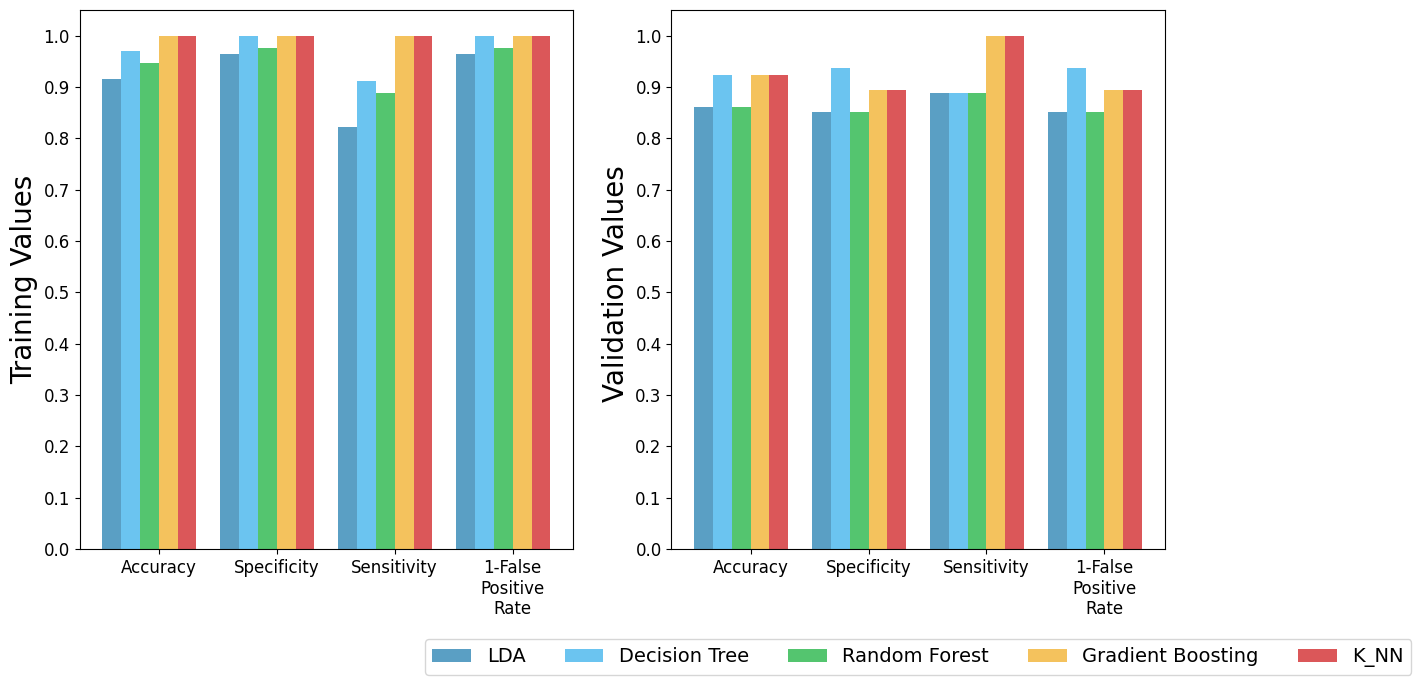

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las etiquetas y los valores para cada métrica y modelo
labels = ['Accuracy', 'Specificity', 'Sensitivity', '1-False\nPositive\nRate']

# Valores para el conjunto de entrenamiento
LDA_train_values = [accuracy_train_LDA, specificity_train_LDA, sensitivity_train_LDA, 1-false_positive_train_LDA]
tree_train_values = [accuracy_train_tree, specificity_train_tree, sensitivity_train_tree, 1-false_positive_train_tree]
rf_train_values = [accuracy_train_rf, specificity_train_rf, sensitivity_train_rf, 1-false_positive_train_rf]
gb_train_values = [accuracy_train_gb, specificity_train_gb, sensitivity_train_gb, 1-false_positive_train_gb]
knn_train_values = [accuracy_train_knn, specificity_train_knn, sensitivity_train_knn, 1-false_positive_train_knn]

# Valores para el conjunto de prueba
LDA_test_values = [accuracy_test_LDA, specificity_test_LDA, sensitivity_test_LDA, 1-false_positive_test_LDA]
tree_test_values = [accuracy_test_tree, specificity_test_tree, sensitivity_test_tree, 1-false_positive_test_tree]
rf_test_values = [accuracy_test_rf, specificity_test_rf, sensitivity_test_rf, 1-false_positive_test_rf]
gb_test_values = [accuracy_test_gb, specificity_test_gb, sensitivity_test_gb, 1-false_positive_test_gb]
knn_test_values = [accuracy_test_knn, specificity_test_knn, sensitivity_test_knn, 1-false_positive_test_knn]

# Crear un arreglo con los índices para las etiquetas
x = np.arange(len(labels))
# Definir el ancho de las barras
width = 0.16

# Crear la figura y los ejes para los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# Colores para los modelos
colors_train = ['#1476AB', '#2DACEB', '#0BAD32', '#F0A818', '#CC1013']
colors_test = ['#1476AB', '#2DACEB', '#0BAD32', '#F0A818', '#CC1013']

# Gráfico de barras para el conjunto de entrenamiento
rects1 = ax1.bar(x - 2*width, LDA_train_values, width, label='LDA', color=colors_train[0], alpha=0.7)
rects2 = ax1.bar(x - width, tree_train_values, width, label='Decision Tree', color=colors_train[1], alpha=0.7)
rects3 = ax1.bar(x, rf_train_values, width, label='Random Forest', color=colors_train[2], alpha=0.7)
rects4 = ax1.bar(x + width, gb_train_values, width, label='Gradient Boosting', color=colors_train[3], alpha=0.7)
rects5 = ax1.bar(x + 2*width, knn_train_values, width, label='KNeighbors', color=colors_train[4], alpha=0.7)

ax1.set_ylabel('Training Values', fontsize=20)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(labels, fontsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_yticks(np.arange(0, max(max(LDA_train_values), max(tree_train_values), max(rf_train_values), max(gb_train_values), max(knn_train_values)) + 0.1, 0.1))

# Gráfico de barras para el conjunto de prueba
rects1 = ax2.bar(x - 2*width, LDA_test_values, width, label='LDA', color=colors_test[0], alpha=0.7)
rects2 = ax2.bar(x - width, tree_test_values, width, label='Decision Tree', color=colors_test[1], alpha=0.7)
rects3 = ax2.bar(x, rf_test_values, width, label='Random Forest', color=colors_test[2], alpha=0.7)
rects4 = ax2.bar(x + width, gb_test_values, width, label='Gradient Boosting', color=colors_test[3], alpha=0.7)
rects5 = ax2.bar(x + 2*width, knn_test_values, width, label='KNeighbors', color=colors_test[4], alpha=0.7)

ax2.set_ylabel('Validation Values ', fontsize=20)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(labels, fontsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_yticks(np.arange(0, max(max(LDA_test_values), max(tree_test_values), max(rf_test_values), max(gb_test_values), max(knn_test_values)) + 0.1, 0.1))

# Añadir leyenda fuera del gráfico
plt.legend(handles=[rects1, rects2, rects3, rects4, rects5], labels=['LDA', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K_NN'],
            loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=14)

# Guardar el gráfico como imagen
plt.savefig('Metric_plot_all_models.png', transparent=True)
plt.show()


In [ ]:
specificity_train_LDA = tn_train_LDA / (tn_train_LDA + fp_train_LDA)
sensitivity_train_LDA = tp_train_LDA / (tp_train_LDA + fn_train_LDA)
accuracy_train_LDA = (tp_train_LDA + tn_train_LDA) / (tp_train_LDA + tn_train_LDA + fp_train_LDA + fn_train_LDA)
false_positive_train_LDA = fp_train_LDA / (fp_train_LDA + tn_train_LDA)

In [ ]:
specificity_train_LDA

0.9647058823529412

In [ ]:
sensitivity_train_LDA

0.8222222222222222

DATOS DE ACCRUACY PARA TABLA.

Acuracy de datos train

In [ ]:
accuracy_train_LDA

0.9153846153846154

In [ ]:
accuracy_train_tree

0.9692307692307692

In [ ]:
accuracy_train_rf

0.9461538461538461

In [ ]:
accuracy_train_gb

1.0

In [ ]:
accuracy_train_knn

1.0

accuracy de datos test

In [ ]:
accuracy_test_LDA

0.8615384615384616

In [ ]:
accuracy_test_tree

0.9230769230769231

In [ ]:
accuracy_test_rf

0.8615384615384616

In [ ]:
accuracy_test_gb

0.9230769230769231

In [ ]:
accuracy_test_knn

0.9230769230769231

In [ ]:
#ROC training

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# Predict probabilities for training set
probas_train_LDA = grid_search_tree.predict_proba(X_train_LDA)[:, 1]
probas_train_tree = grid_search_tree.predict_proba(X_train_tree)[:, 1]
probas_train_rf = grid_search_rf.predict_proba(X_train_rf)[:, 1]
probas_train_gb = grid_search_gb.predict_proba(X_train_gb)[:, 1]
probas_train_knn = grid_search_knn.predict_proba(X_train_knn)[:, 1]

In [ ]:
# Compute ROC curve and AUC for LDA
fpr_train_LDA, tpr_train_LDA, thresholds_train_LDA = roc_curve(y_train_LDA, probas_train_LDA )
roc_auc_train_LDA = auc(fpr_train_LDA, tpr_train_LDA)

In [ ]:
# Compute ROC curve and AUC for decision tree model
fpr_train_tree, tpr_train_tree, thresholds_train_tree = roc_curve(y_train_tree, probas_train_tree )
roc_auc_train_tree = auc(fpr_train_tree, tpr_train_tree)

In [ ]:
# Compute ROC curve and AUC for ramdom forest
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train_rf, probas_train_rf )
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

In [ ]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_train_gb, tpr_train_gb, thresholds_train_gb= roc_curve(y_train_gb, probas_train_gb)
roc_auc_train_gb = auc(fpr_train_gb, tpr_train_gb)

In [ ]:
# Compute ROC curve and AUC for Gradient KNN
fpr_train_knn, tpr_train_knn, thresholds_train_knn= roc_curve(y_train_knn, probas_train_knn)
roc_auc_train_knn = auc(fpr_train_knn, tpr_train_knn)

In [ ]:
# Plot ROC curves Me quedo con esta opcion.
plt.plot(fpr_train_LDA, tpr_train_LDA, color='#1476AB', lw=2, label='LDA ROC curve (area = %0.2f)' % roc_auc_train_LDA)
plt.plot(fpr_train_tree, tpr_train_tree, color='#2DACEB', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_train_tree)
plt.plot(fpr_train_rf, tpr_train_rf, color='#0BAD32', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_train_rf)

# Plot GB ROC curve with adjusted x-axis limits
plt.plot(fpr_train_gb[fpr_train_gb <= 0.87], tpr_train_gb[fpr_train_gb <= 0.87], color='#F0A818', lw=2, label='GB ROC curve (area = %0.2f)' % roc_auc_train_gb)

plt.plot(fpr_train_knn, tpr_train_knn, color='#CC1013', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_train_knn)  # Added KNeighbors ROC
plt.plot([0, 1.0], [0, 1.0], color='#170D03', lw=2, linestyle='--')  # Limit GB ROC curve up to 0.98

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the limits of the x-axis and y-axis with a space before and after
plt.xlim([0 - 0.05, 1.05])  # Limit the x-axis up to 1.05
plt.gca().set_ylim([0 - 0.05, 1 + 0.05])

plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_train.png', dpi=600, transparent=True)
plt.show()

In [ ]:
# Curva ROC prediction

In [ ]:
probas_test_LDA = grid_search_tree.predict_proba(X_test_LDA)[:, 1]
probas_test_tree = grid_search_tree.predict_proba(X_test_tree)[:, 1]
probas_test_rf = grid_search_rf.predict_proba(X_test_rf)[:, 1]
probas_test_gb = grid_search_gb.predict_proba(X_test_gb)[:, 1]
probas_test_knn = grid_search_knn.predict_proba(X_test_knn)[:, 1]

In [ ]:
# Compute ROC curve and AUC for decision tree model
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = roc_curve(y_test_LDA, probas_test_LDA)
roc_auc_test_LDA = auc(fpr_test_LDA, tpr_test_LDA)

In [ ]:
# Compute ROC curve and AUC for decision tree model
fpr_test_tree, tpr_test_tree, thresholds_test_tree = roc_curve(y_test_tree, probas_test_tree)
roc_auc_test_tree = auc(fpr_test_tree, tpr_test_tree)

In [ ]:
# Compute ROC curve and AUC for ramdom forest
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test_rf, probas_test_rf )
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

In [ ]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_gb, tpr_test_gb, thresholds_test_gb= roc_curve(y_test_gb, probas_test_gb)
roc_auc_test_gb = auc(fpr_test_gb, tpr_test_gb)

In [ ]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_knn, tpr_test_knn, thresholds_test_knn= roc_curve(y_test_knn, probas_test_knn)
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

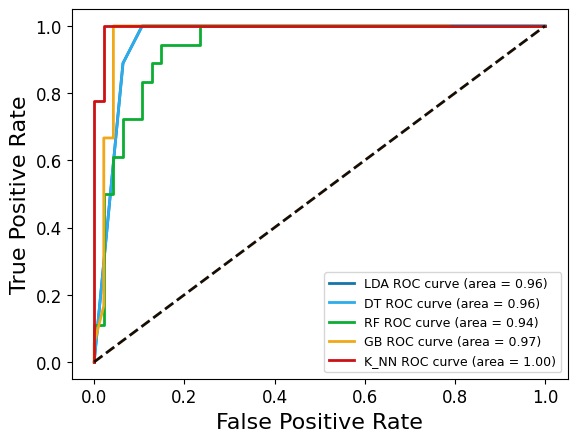

In [ ]:
# Plot ROC curves Me quedo con esta opcion.
plt.plot(fpr_test_LDA, tpr_test_LDA, color='#1476AB', lw=2, label='LDA ROC curve (area = %0.2f)' % roc_auc_test_LDA)
plt.plot(fpr_test_tree, tpr_test_tree, color='#2DACEB', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_test_tree)
plt.plot(fpr_test_rf, tpr_test_rf, color='#0BAD32', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_test_rf)

# Plot GB ROC curve with adjusted x-axis limits
plt.plot(fpr_test_gb[fpr_test_gb <= 0.88], tpr_test_gb[fpr_test_gb <= 0.88], color='#F0A818', lw=2, label='GB ROC curve (area = %0.2f)' % roc_auc_test_gb)

plt.plot(fpr_test_knn, tpr_test_knn, color='#CC1013', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_test_knn)  # Added KNeighbors ROC
plt.plot([0, 1.0], [0, 1.0], color='#170D03', lw=2, linestyle='--')  # Limit GB ROC curve up to 0.98

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the limits of the x-axis and y-axis with a space before and after
plt.xlim([0 - 0.05, 1.05])  # Limit the x-axis up to 1.05
plt.gca().set_ylim([0 - 0.05, 1 + 0.05])

plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_val.png', dpi=600, transparent=True)
plt.show()

In [ ]:
cm_train_LDA

array([[82,  3],
       [ 8, 37]])

In [ ]:
cm_train_tree

array([[85,  0],
       [ 4, 41]])

In [ ]:
cm_train_rf

array([[83,  2],
       [ 5, 40]])

In [ ]:
cm_train_gb

array([[85,  0],
       [ 0, 45]])

In [ ]:
cm_train_knn

array([[85,  0],
       [ 0, 45]])

In [ ]:
cm_pred_test_LDA

array([[40,  7],
       [ 2, 16]])

In [ ]:
cm_pred_test_tree

array([[44,  3],
       [ 2, 16]])

In [ ]:
cm_pred_test_rf

array([[40,  7],
       [ 2, 16]])

In [ ]:
cm_pred_test_gb

array([[42,  5],
       [ 0, 18]])

In [ ]:
cm_pred_test_knn

array([[42,  5],
       [ 0, 18]])

Prueba modelos no supervisados

In [ ]:
data

f(vij)class  f(vij)class.1   DD1(s2)    DD2(s2)   DD3(s2)   DV1(s2)  \
0              0       0.333333 -0.522222 -13.777778 -6.008084  0.164695   
1              0       0.333333 -0.522222 -17.777778 -4.916389 -0.723537   
2              0       0.333333 -0.522222 -12.777778 -4.186549 -0.985434   
3              0       0.333333 -0.522222 -10.777778 -5.269133 -0.698610   
4              0       0.333333 -0.522222  -9.777778 -3.073074 -1.065304   
..           ...            ...       ...        ...       ...       ...   
190            0       0.333333 -0.522222 -12.555556 -7.100049  0.539337   
191            0       0.333333 -0.722222 -15.555556 -8.929475  0.726417   
192            0       0.333333 -0.122222   0.444444  1.367948  0.753016   
193            0       0.333333  0.077778   8.444444 -0.867183  0.937530   
194            0       0.333333 -0.322222  -4.555556 -3.398120  1.242307   

      DV2(s2)   DV3(s2)   DV4(s2)   DV5(s2)    DV6(s2)   DD1(s3)   DD2(s3)  \
0   -0.156926 -0.007768  0.052922 -0.000653  -6.687222 -0.208511 -4.042553   
1    0.013363  0.710175  0.022200 -0.059107 -12.987222 -0.208511 -8.042553   
2    0.022470  0.962964  0.028626 -0.013043  -4.967222 -0.208511 -3.042553   
3    0.234161  0.464450 -0.061923 -0.025419  -2.577222 -0.208511 -1.042553   
4   -0.258744  1.324049  0.137579  0.023461  -1.757222 -0.208511 -0.042553   
..        ...       ...       ...       ...        ...       ...       ...   
190  0.753685 -1.293022 -0.304248 -0.074722  -2.721667 -0.008511 -0.042553   
191  0.928068 -1.654485 -0.376988 -0.071852  -0.111667 -0.208511 -3.042553   
192 -0.067898 -0.685118 -0.002763  0.027225  -2.111667 -0.240964 -2.487952   
193 -0.179487 -0.758043  0.032332  0.056226  -6.851667 -0.040964  5.512048   
194  0.250877 -1.493184 -0.141277  0.020572  -4.411667 -0.440964 -7.487952   

      DD3(s3)   DV1(s3)   DV2(s3)   DV3(s3)   DV4(s3)   DV5(s3)    DV6(s3)  
0   -4.209042  0.051592 -0.598721  0.547129  0.223624  0.041076   2.062979  
1   -3.117348 -0.836640 -0.428433  1.265072  0.192901 -0.017378  -4.237021  
2   -2.387508 -1.098536 -0.419325  1.517861  0.199328  0.028686   3.782979  
3   -3.470091 -0.811713 -0.207634  1.019347  0.108778  0.016311   6.172979  
4   -1.274033 -1.178407 -0.700539  1.878946  0.308280  0.065191   6.992979  
..        ...       ...       ...       ...       ...       ...        ...  
190 -0.873467  1.029872  0.749739 -1.779611 -0.321225 -0.082703  -4.837021  
191 -2.702893  1.216952  0.924121 -2.141074 -0.393965 -0.079833  -2.227021  
192  0.006154  1.127768  0.250668 -1.378437 -0.136887 -0.010813 -12.222892  
193 -2.228977  1.312283  0.139079 -1.451362 -0.101792  0.018187 -16.962892  
194 -4.759914  1.617059  0.569443 -2.186502 -0.275401 -0.017467 -14.522892  

[195 rows x 20 columns]

In [ ]:
data_nosupervisado = data.drop(columns=['f(vij)class'])
data_nosupervisado

f(vij)class.1   DD1(s2)    DD2(s2)   DD3(s2)   DV1(s2)   DV2(s2)  \
0         0.333333 -0.522222 -13.777778 -6.008084  0.164695 -0.156926   
1         0.333333 -0.522222 -17.777778 -4.916389 -0.723537  0.013363   
2         0.333333 -0.522222 -12.777778 -4.186549 -0.985434  0.022470   
3         0.333333 -0.522222 -10.777778 -5.269133 -0.698610  0.234161   
4         0.333333 -0.522222  -9.777778 -3.073074 -1.065304 -0.258744   
..             ...       ...        ...       ...       ...       ...   
190       0.333333 -0.522222 -12.555556 -7.100049  0.539337  0.753685   
191       0.333333 -0.722222 -15.555556 -8.929475  0.726417  0.928068   
192       0.333333 -0.122222   0.444444  1.367948  0.753016 -0.067898   
193       0.333333  0.077778   8.444444 -0.867183  0.937530 -0.179487   
194       0.333333 -0.322222  -4.555556 -3.398120  1.242307  0.250877   

      DV3(s2)   DV4(s2)   DV5(s2)    DV6(s2)   DD1(s3)   DD2(s3)   DD3(s3)  \
0   -0.007768  0.052922 -0.000653  -6.687222 -0.208511 -4.042553 -4.209042   
1    0.710175  0.022200 -0.059107 -12.987222 -0.208511 -8.042553 -3.117348   
2    0.962964  0.028626 -0.013043  -4.967222 -0.208511 -3.042553 -2.387508   
3    0.464450 -0.061923 -0.025419  -2.577222 -0.208511 -1.042553 -3.470091   
4    1.324049  0.137579  0.023461  -1.757222 -0.208511 -0.042553 -1.274033   
..        ...       ...       ...        ...       ...       ...       ...   
190 -1.293022 -0.304248 -0.074722  -2.721667 -0.008511 -0.042553 -0.873467   
191 -1.654485 -0.376988 -0.071852  -0.111667 -0.208511 -3.042553 -2.702893   
192 -0.685118 -0.002763  0.027225  -2.111667 -0.240964 -2.487952  0.006154   
193 -0.758043  0.032332  0.056226  -6.851667 -0.040964  5.512048 -2.228977   
194 -1.493184 -0.141277  0.020572  -4.411667 -0.440964 -7.487952 -4.759914   

      DV1(s3)   DV2(s3)   DV3(s3)   DV4(s3)   DV5(s3)    DV6(s3)  
0    0.051592 -0.598721  0.547129  0.223624  0.041076   2.062979  
1   -0.836640 -0.428433  1.265072  0.192901 -0.017378  -4.237021  
2   -1.098536 -0.419325  1.517861  0.199328  0.028686   3.782979  
3   -0.811713 -0.207634  1.019347  0.108778  0.016311   6.172979  
4   -1.178407 -0.700539  1.878946  0.308280  0.065191   6.992979  
..        ...       ...       ...       ...       ...        ...  
190  1.029872  0.749739 -1.779611 -0.321225 -0.082703  -4.837021  
191  1.216952  0.924121 -2.141074 -0.393965 -0.079833  -2.227021  
192  1.127768  0.250668 -1.378437 -0.136887 -0.010813 -12.222892  
193  1.312283  0.139079 -1.451362 -0.101792  0.018187 -16.962892  
194  1.617059  0.569443 -2.186502 -0.275401 -0.017467 -14.522892  

[195 rows x 19 columns]

In [ ]:
from sklearn.cluster import KMeans

KNN = KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,n_clusters=2, n_init=10,random_state=None, tol=0.0001, verbose=0)

KNN.fit(data_nosupervisado)

KMeans(n_clusters=2, n_init=10)

In [ ]:
#KNN.cluster_centers_: Obtiene las coordenadas de los centroides de los clústeres.
#pd.DataFrame(centros): Convierte los centros en un DataFrame para facilitar su análisis.
#centros.columns = datosNorm1.columns: Etiqueta las columnas de los centros con los nombres originales de las variables.
centros = KNN.cluster_centers_
centros=pd.DataFrame(centros)
centros.columns=data_nosupervisado.columns

In [ ]:
centros

f(vij)class.1   DD1(s2)    DD2(s2)    DD3(s2)   DV1(s2)   DV2(s2)  \
0       0.315541  0.901750  20.207966  10.941879 -0.663449 -0.573296   
1       0.314073 -0.345113  -7.489891  -4.167069  0.289198  0.198475   

    DV3(s2)   DV4(s2)   DV5(s2)   DV6(s2)   DD1(s3)    DD2(s3)   DD3(s3)  \
0  1.236745  0.240959  0.053471  8.425982  0.728107  16.156152  8.402922   
1 -0.487673 -0.085660 -0.018082 -3.101526 -0.281092  -6.009964 -3.265179   

    DV1(s3)   DV2(s3)   DV3(s3)   DV4(s3)   DV5(s3)   DV6(s3)  
0 -0.814663 -0.547258  1.361922  0.236841  0.052600  6.594210  
1  0.339386  0.187925 -0.527311 -0.083575 -0.017722 -2.407094

In [ ]:
data_nosupervisado["cluster"] = KNN.fit_predict(data_nosupervisado)
data_nosupervisado.head(10)


f(vij)class.1   DD1(s2)    DD2(s2)   DD3(s2)   DV1(s2)   DV2(s2)   DV3(s2)  \
0       0.333333 -0.522222 -13.777778 -6.008084  0.164695 -0.156926 -0.007768   
1       0.333333 -0.522222 -17.777778 -4.916389 -0.723537  0.013363  0.710175   
2       0.333333 -0.522222 -12.777778 -4.186549 -0.985434  0.022470  0.962964   
3       0.333333 -0.522222 -10.777778 -5.269133 -0.698610  0.234161  0.464450   
4       0.333333 -0.522222  -9.777778 -3.073074 -1.065304 -0.258744  1.324049   
5       0.333333 -0.522222 -13.777778 -5.718804 -0.588608 -0.080681  0.669289   
6       0.333333 -0.322222 -12.777778 -0.967812  0.357709  0.855650 -1.213360   
7       0.333333  1.077778  23.222222  2.474428  0.160124 -0.724251  0.564126   
8       0.333333 -0.522222 -13.777778 -3.732715  1.167653  0.747447 -1.915100   
9       0.333333  0.477778  12.222222  6.447434  0.790038 -0.204545 -0.585492   

    DV4(s2)   DV5(s2)    DV6(s2)   DD1(s3)    DD2(s3)   DD3(s3)   DV1(s3)  \
0  0.052922 -0.000653  -6.687222 -0.208511  -4.042553 -4.209042  0.051592   
1  0.022200 -0.059107 -12.987222 -0.208511  -8.042553 -3.117348 -0.836640   
2  0.028626 -0.013043  -4.967222 -0.208511  -3.042553 -2.387508 -1.098536   
3 -0.061923 -0.025419  -2.577222 -0.208511  -1.042553 -3.470091 -0.811713   
4  0.137579  0.023461  -1.757222 -0.208511  -0.042553 -1.274033 -1.178407   
5  0.052551 -0.009939  -5.427222 -0.208511  -4.042553 -3.919762 -0.701711   
6 -0.335827  0.010727  -6.857222 -0.640964 -18.487952 -6.757147  0.128825   
7  0.266831  0.029642   6.142778  0.759036  17.512048 -3.314906 -0.068760   
8 -0.325548 -0.063420  -5.317222 -0.840964 -19.487952 -9.522049  0.938768   
9  0.047324  0.044337   1.912778  0.159036   6.512048  0.658099  0.561153   

    DV2(s3)   DV3(s3)   DV4(s3)   DV5(s3)   DV6(s3)  cluster  
0 -0.598721  0.547129  0.223624  0.041076  2.062979        1  
1 -0.428433  1.265072  0.192901 -0.017378 -4.237021        1  
2 -0.419325  1.517861  0.199328  0.028686  3.782979        1  
3 -0.207634  1.019347  0.108778  0.016311  6.172979        1  
4 -0.700539  1.878946  0.308280  0.065191  6.992979        1  
5 -0.522476  1.224187  0.223253  0.031790  3.322979        1  
6  0.736367 -0.865192 -0.282272  0.022400 -6.102892        1  
7 -0.843534  0.912294  0.320386  0.041314  6.897108        0  
8  0.628164 -1.566932 -0.271993 -0.051748 -4.562892        1  
9 -0.323828 -0.237324  0.100879  0.056009  2.667108        0

In [ ]:
data["cluster"] = KNN.fit_predict(data_nosupervisado)
data.head(10)


f(vij)class  f(vij)class.1   DD1(s2)    DD2(s2)   DD3(s2)   DV1(s2)  \
0            0       0.333333 -0.522222 -13.777778 -6.008084  0.164695   
1            0       0.333333 -0.522222 -17.777778 -4.916389 -0.723537   
2            0       0.333333 -0.522222 -12.777778 -4.186549 -0.985434   
3            0       0.333333 -0.522222 -10.777778 -5.269133 -0.698610   
4            0       0.333333 -0.522222  -9.777778 -3.073074 -1.065304   
5            0       0.333333 -0.522222 -13.777778 -5.718804 -0.588608   
6            0       0.333333 -0.322222 -12.777778 -0.967812  0.357709   
7            1       0.333333  1.077778  23.222222  2.474428  0.160124   
8            0       0.333333 -0.522222 -13.777778 -3.732715  1.167653   
9            1       0.333333  0.477778  12.222222  6.447434  0.790038   

    DV2(s2)   DV3(s2)   DV4(s2)   DV5(s2)  ...   DD1(s3)    DD2(s3)   DD3(s3)  \
0 -0.156926 -0.007768  0.052922 -0.000653  ... -0.208511  -4.042553 -4.209042   
1  0.013363  0.710175  0.022200 -0.059107  ... -0.208511  -8.042553 -3.117348   
2  0.022470  0.962964  0.028626 -0.013043  ... -0.208511  -3.042553 -2.387508   
3  0.234161  0.464450 -0.061923 -0.025419  ... -0.208511  -1.042553 -3.470091   
4 -0.258744  1.324049  0.137579  0.023461  ... -0.208511  -0.042553 -1.274033   
5 -0.080681  0.669289  0.052551 -0.009939  ... -0.208511  -4.042553 -3.919762   
6  0.855650 -1.213360 -0.335827  0.010727  ... -0.640964 -18.487952 -6.757147   
7 -0.724251  0.564126  0.266831  0.029642  ...  0.759036  17.512048 -3.314906   
8  0.747447 -1.915100 -0.325548 -0.063420  ... -0.840964 -19.487952 -9.522049   
9 -0.204545 -0.585492  0.047324  0.044337  ...  0.159036   6.512048  0.658099   

    DV1(s3)   DV2(s3)   DV3(s3)   DV4(s3)   DV5(s3)   DV6(s3)  cluster  
0  0.051592 -0.598721  0.547129  0.223624  0.041076  2.062979        0  
1 -0.836640 -0.428433  1.265072  0.192901 -0.017378 -4.237021        0  
2 -1.098536 -0.419325  1.517861  0.199328  0.028686  3.782979        0  
3 -0.811713 -0.207634  1.019347  0.108778  0.016311  6.172979        0  
4 -1.178407 -0.700539  1.878946  0.308280  0.065191  6.992979        0  
5 -0.701711 -0.522476  1.224187  0.223253  0.031790  3.322979        0  
6  0.128825  0.736367 -0.865192 -0.282272  0.022400 -6.102892        0  
7 -0.068760 -0.843534  0.912294  0.320386  0.041314  6.897108        1  
8  0.938768  0.628164 -1.566932 -0.271993 -0.051748 -4.562892        0  
9  0.561153 -0.323828 -0.237324  0.100879  0.056009  2.667108        1  

[10 rows x 21 columns]